In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [39]:
sns.set(rc={'figure.figsize':(12,5)})

## Load the Dataset

In [4]:
df=pd.read_csv("Diwali Sales Data.csv", encoding= "unicode_escape")

In [5]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Checking the null values

In [9]:
round(df.isnull().sum()/df.shape[0]*100,2)

User_ID               0.00
Cust_name             0.00
Product_ID            0.00
Gender                0.00
Age Group             0.00
Age                   0.00
Marital_Status        0.00
State                 0.00
Zone                  0.00
Occupation            0.00
Product_Category      0.00
Orders                0.00
Amount                0.11
Status              100.00
unnamed1            100.00
dtype: float64

In [10]:
#drop blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

0.5580257366658404


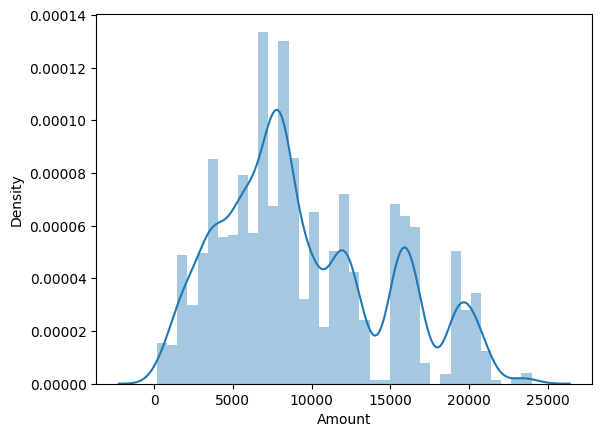

In [12]:
sns.distplot(df.Amount)
print(df.Amount.skew())
plt.show()

In [12]:
df.loc[df.Amount.isnull(),"Amount"]=df.Amount.median()

In [13]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
#change data type
df['Amount']=df['Amount'].astype('int')

In [15]:
df['Amount'].dtypes

dtype('int64')

In [16]:
df.Amount.nunique()

6583

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
#Rename column
df.rename(columns={'Marital_Status' : 'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [19]:
df.groupby(['Zone','State'])['State'].count()

Zone      State           
Central   Delhi               1107
          Madhya Pradesh       923
          Uttar Pradesh       1946
          Uttarakhand          320
Eastern   Bihar                434
          Jharkhand            380
Northern  Haryana              452
          Himachal Pradesh     608
          Punjab               200
          Rajasthan            231
Southern  Andhra Pradesh       812
          Karnataka           1305
          Kerala               453
          Telangana            125
Western   Gujarat              429
          Maharashtra         1526
Name: State, dtype: int64

In [20]:
#describe() mwthod returns description of the data in the DataFrame (i.e.count,mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9452.176429
std,1.716125e+03,12.754122,0.493632,1.115047,5219.753707
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [21]:
# Use describe() for specific columns
df[['Age','Amount']].describe()

,Age,Amount
count,11251.000000,11251.000000
mean,35.421207,9452.176429
std,12.754122,5219.753707
min,12.000000,188.000000
25%,27.000000,5443.500000
50%,33.000000,8109.000000
75%,43.000000,12671.000000
max,92.000000,23952.000000


# Exploratory Data Analysis

#### Gender

In [22]:
# Plotting a bar chart 


##### in Above Graph number females is higher than male that means majority of our customers are women

<Axes: xlabel='Gender', ylabel='Amount'>

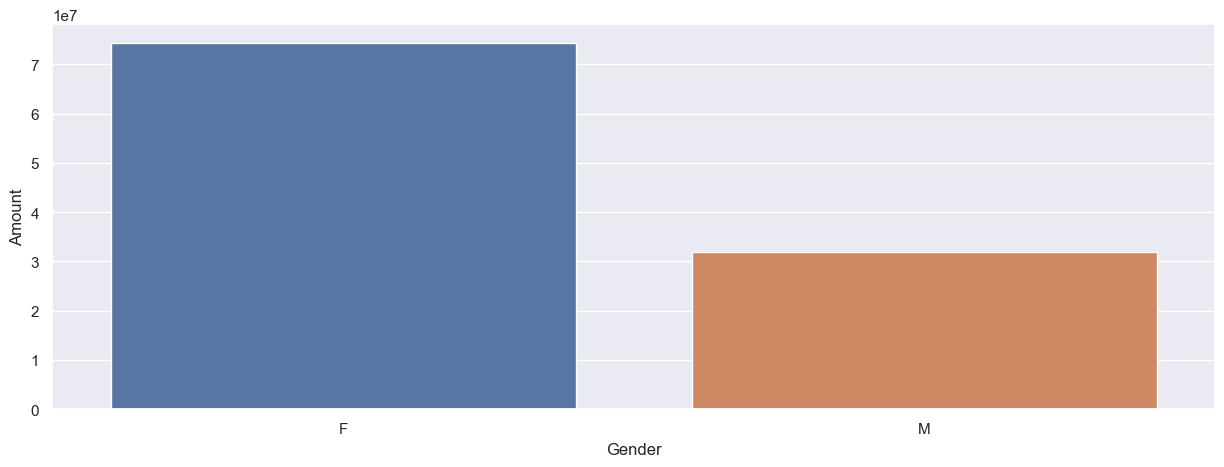

In [23]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum()
sns.barplot(x='Gender',y='Amount', data=sales_gen,hue='Gender')

##### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## Age

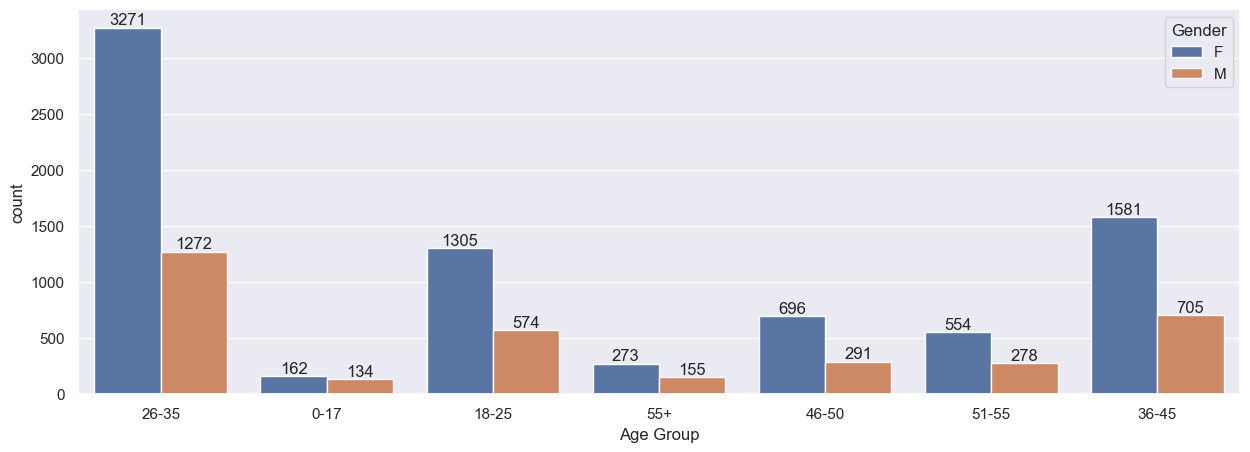

In [24]:
ax= sns.countplot(data=df,x='Age Group',hue='Gender')
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Age Group', ylabel='Amount'>

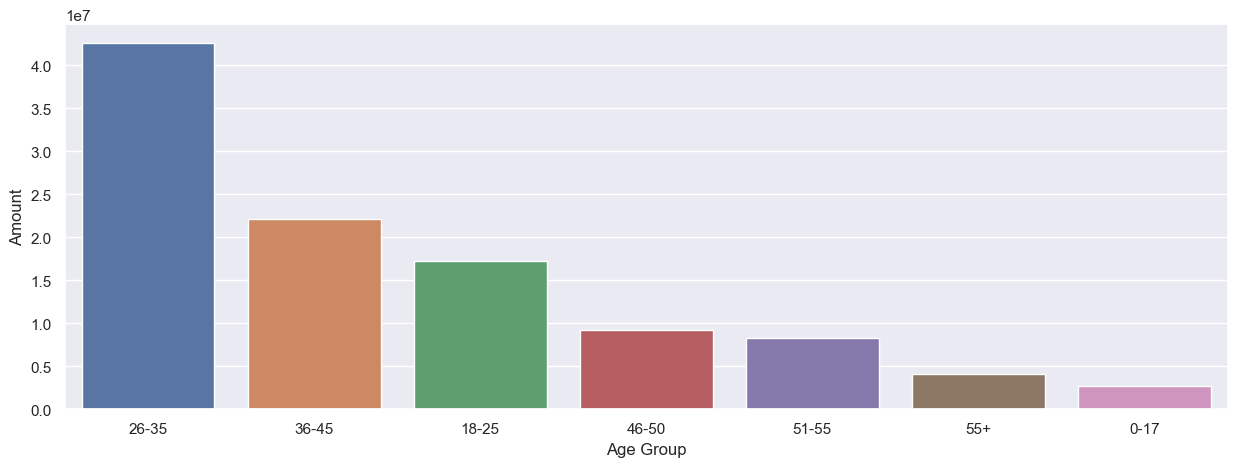

In [25]:
# Total Amount vs Age group
sales_Age= df.groupby(['Age Group'], as_index= False)['Amount'].sum()\
.sort_values(by='Amount', ascending= False)

sns.barplot(x= 'Age Group', y= 'Amount', data= sales_Age,hue='Age Group')

#### from above graph we can see that most of the buyers are of same afe group bt 26-35 yrs female


#### State

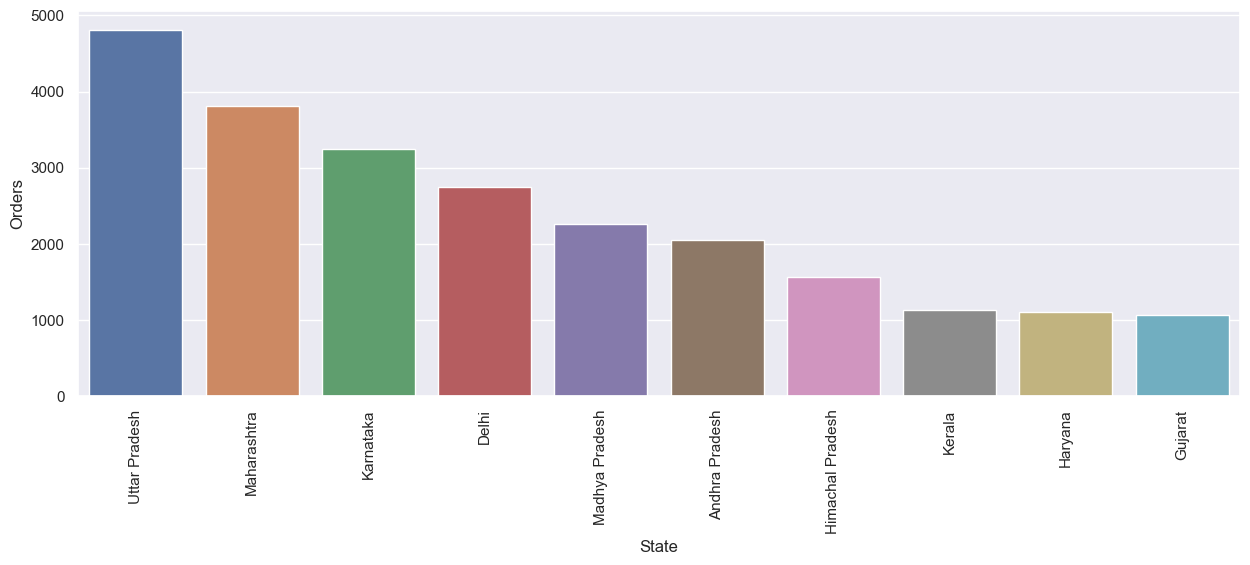

In [26]:
# total number of orders from top 10 states

sales_state= df.groupby(['State'], as_index=False)['Orders'].sum()\
.sort_values(by='Orders',ascending=False).head(10)

sns.barplot(data=sales_state,x='State',y='Orders',hue='State')
plt.xticks(rotation=90)
plt.show()

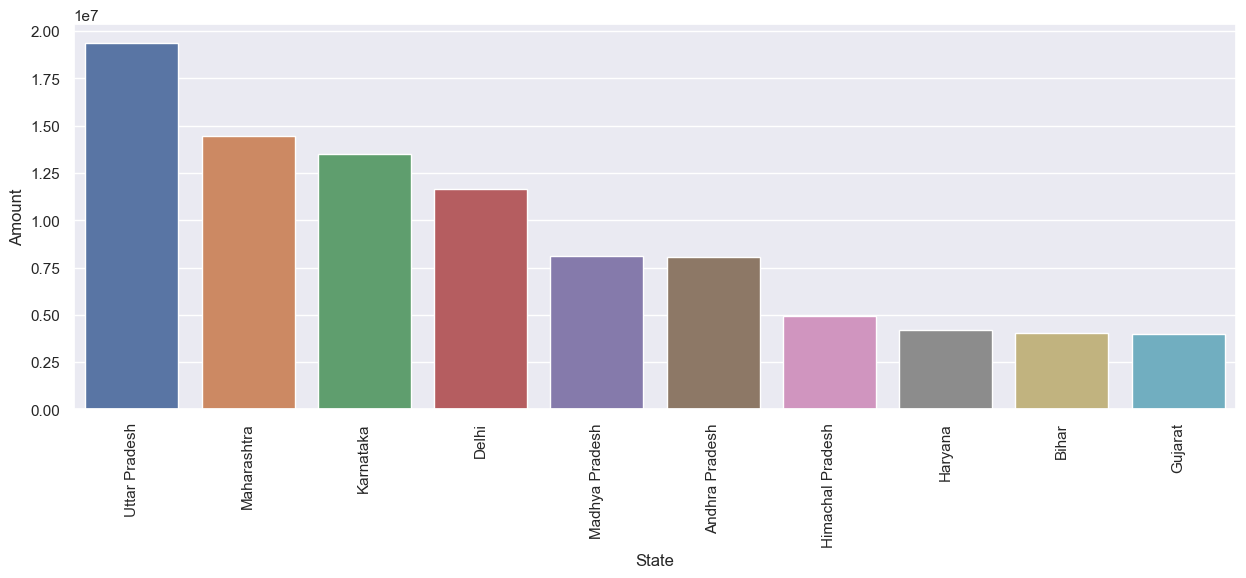

In [27]:
# total amount/sales from top 10 states

sales_state= df.groupby(['State'], as_index=False)['Amount'].sum()\
.sort_values(by='Amount',ascending=False).head(10)

sns.barplot(data=sales_state,x='State',y='Amount',hue='State')
plt.xticks(rotation=90)
plt.show()

#### From above graphs we can see that most of the orders and total sales/amount are from uttar pradesh 

### Marital status

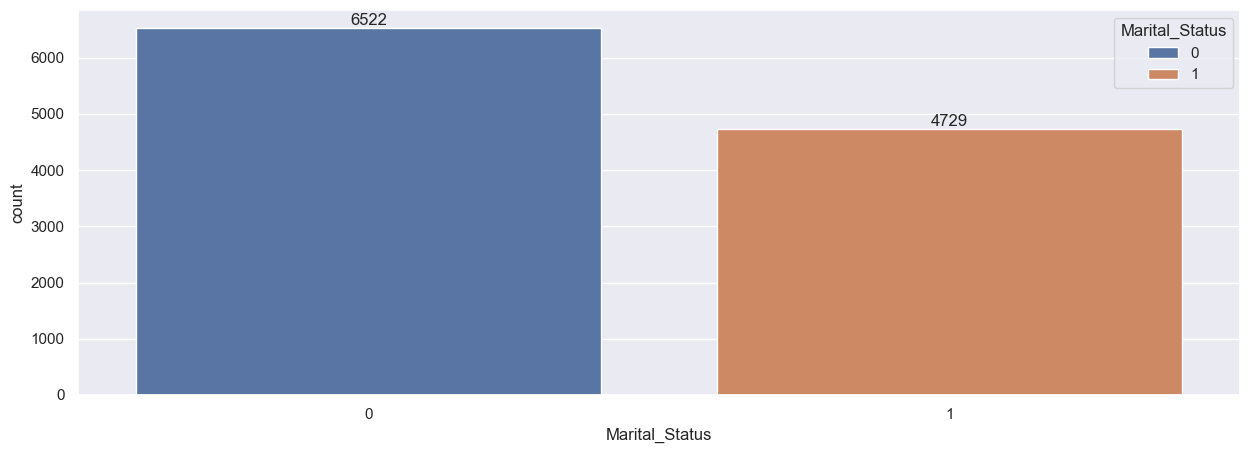

In [30]:
ax=sns.countplot(data=df,x="Marital_Status",hue="Marital_Status")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

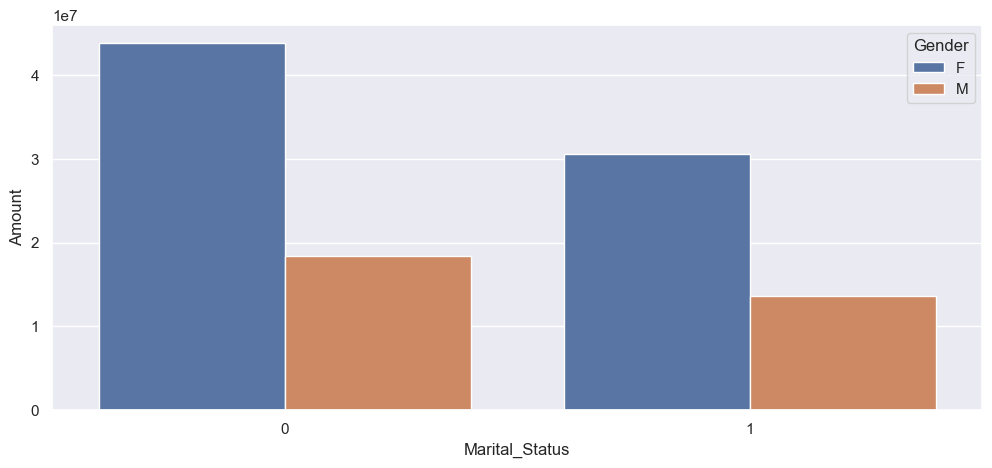

In [40]:
sales_state= df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum()\
.sort_values(by='Amount',ascending=False)

sns.barplot(data= sales_state, x= 'Marital_Status', y= 'Amount',hue='Gender')

##### From above graph we csn see that most of the buyers are unmarried (women) and they have high purchasing power

### Occupation

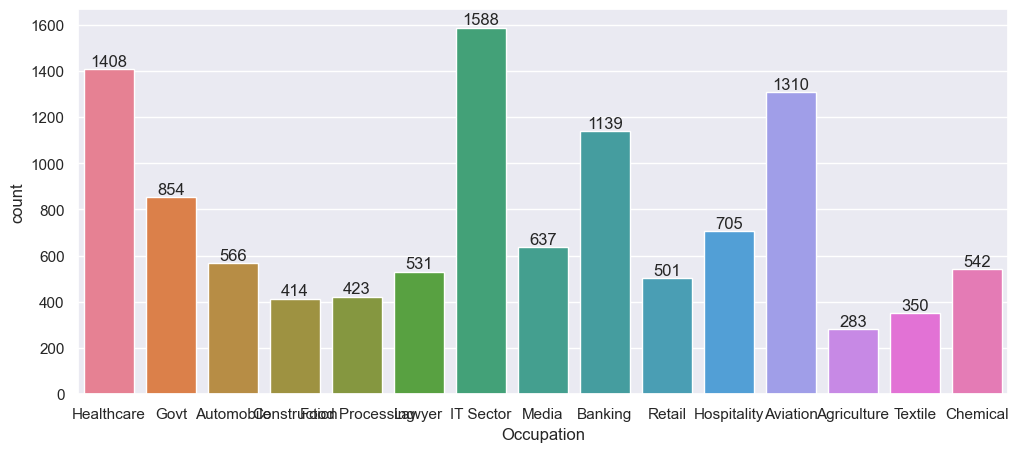

In [42]:
ax=sns.countplot(data=df,x="Occupation",hue="Occupation")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(
plt.show()

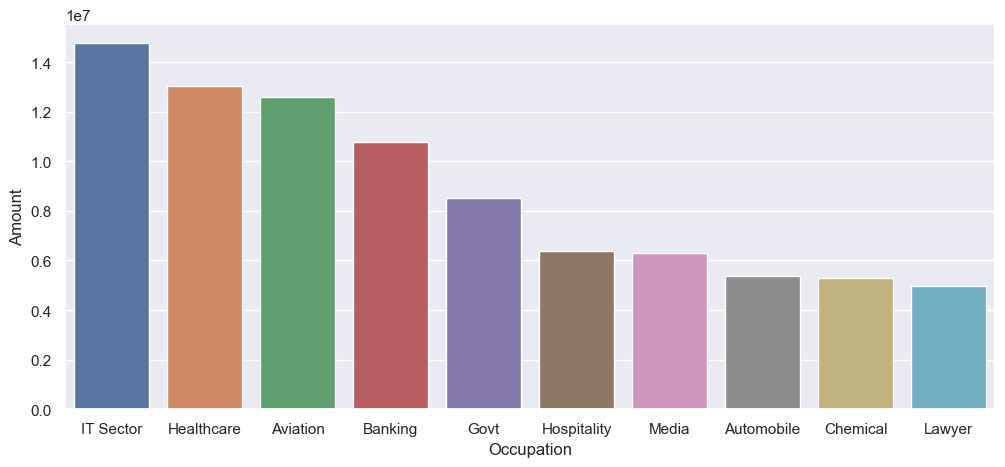

In [44]:
sales_state= df.groupby(['Occupation'], as_index=False)['Amount'].sum()\
.sort_values(by='Amount',ascending=False).head(10)

sns.barplot(data=sales_state,x='Occupation',y='Amount',hue='Occupation')
plt.show()

### Product Category

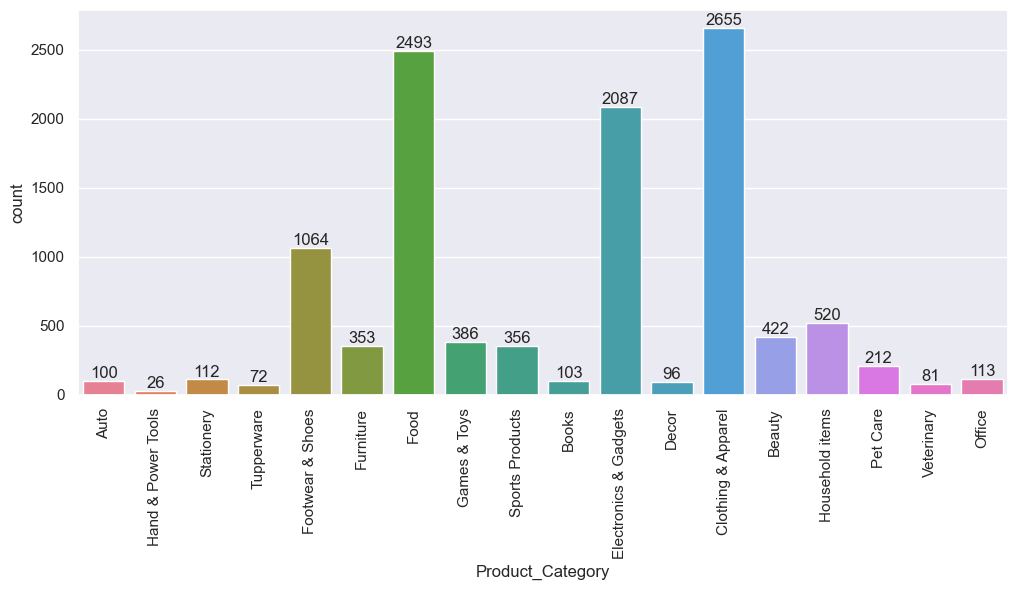

In [47]:
ax=sns.countplot(data=df,x="Product_Category",hue="Product_Category")
for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=90)
plt.show()

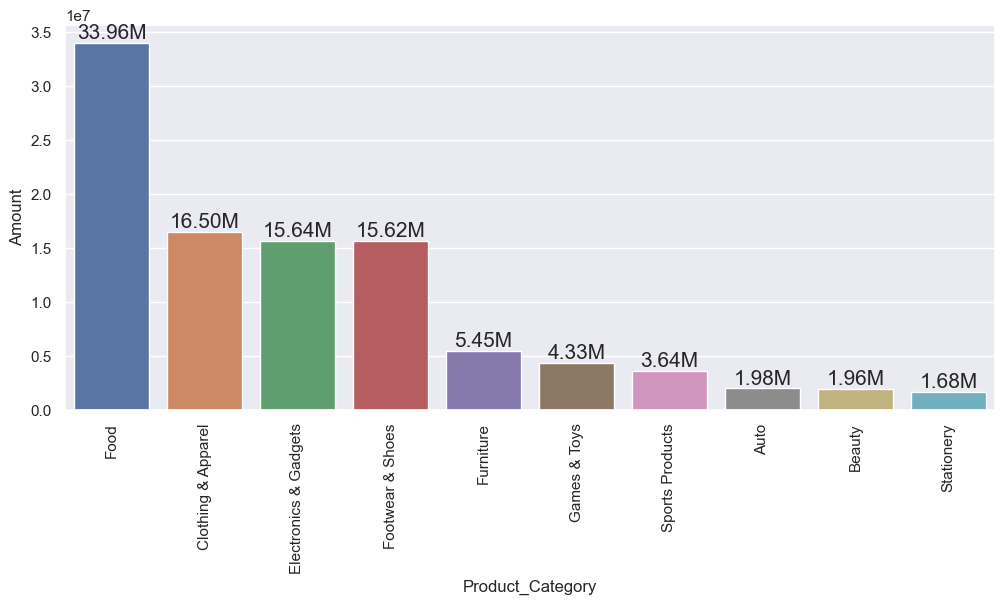

In [54]:
sales_state= df.groupby(['Product_Category'], as_index=False)['Amount'].sum()\
.sort_values(by='Amount',ascending=False).head(10)

ax=sns.barplot(data=sales_state,x='Product_Category',y='Amount',hue='Product_Category')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X position of text
            p.get_height() + 900000,         # Y position of text (just above the bar)
            f'{p.get_height() / 1_000_000:.2f}M',  # Format value in millions
            ha='center',                    # Horizontal alignment
            va='center',                    # Vertical alignment
            fontsize=15)
plt.xticks(rotation=90)    
plt.show()


#### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

In [57]:
df.groupby('Product_ID')['Orders'].sum().nlargest(10)

Product_ID
P00265242    127
P00110942    116
P00237542     91
P00184942     82
P00025442     79
P00114942     79
P00117942     76
P00145042     76
P00044442     75
P00110842     74
Name: Orders, dtype: int64

In [58]:
df.loc[df.Product_ID=='P00265242','Product_Category'].value_counts()

Product_Category
Food                     17
Clothing & Apparel       15
Electronics & Gadgets    11
Footwear & Shoes          3
Sports Products           2
Stationery                1
Furniture                 1
Games & Toys              1
Beauty                    1
Household items           1
Name: count, dtype: int64

<Axes: ylabel='Orders'>

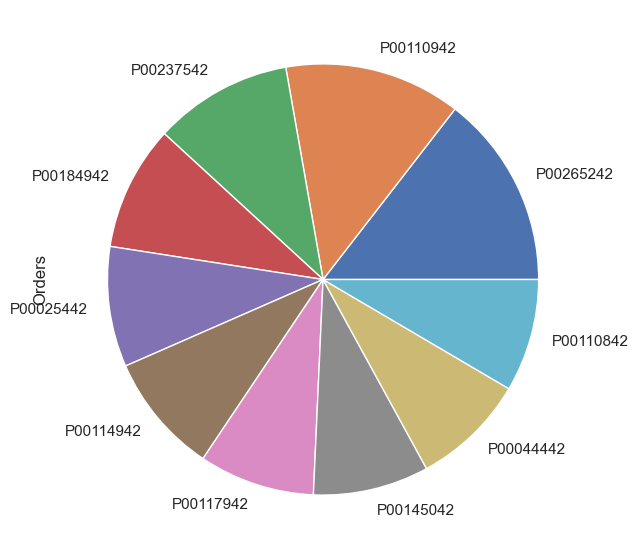

In [71]:
# Top 10 most sold products (same thing as above)

plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='pie')

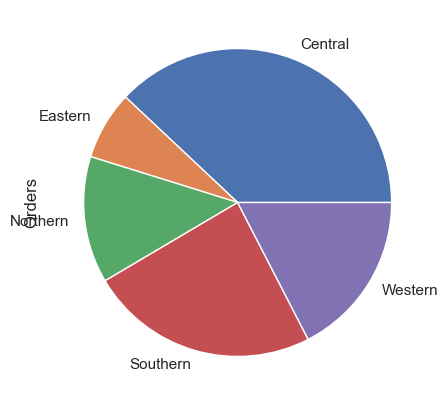

In [75]:
ax=df.groupby('Zone')['Orders'].sum().plot(kind="pie")

## Conclusion:





*Unmarried Women age group 26-35 yrs from UP.Maharastra and Karnataka working in IT,Healthcare and Aviation are more likely to buy products from Foods, Clothing and Electronics category*

## Project Learning:

* Performed data cleaning and manipulation.

* Performed exploratory data analysis (EDA) using pandas, matplotlib and seaborn libraries.

* Improved customer experience by identifying potential customers across different states, occupation, gender and age groups.

* Improved sales by identifying most selling product categories and products, which can help to plan inventory and hence meet the demands.